In [1]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
# Load data
cifar = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar.load_data()
X_train, X_test = X_train / 255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)

170500096/170498071 [==============================] - 2529s 15us/step
X_train shape (50000, 32, 32, 3)
y_train shape (50000,)


In [3]:
# Number of classes
K = len(set(y_train))
print('No. of classes',K)

No. of classes 10


In [4]:
# Build model (Functional API)
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=1,activation='relu')(i)
x = Conv2D(64, (3,3), strides=1, activation='relu')(x)
x = Conv2D(128, (3,3), strides=1, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [5]:
# Compile and fit
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 40s 26ms/step - loss: 1.3850 - accuracy: 0.5035 - val_loss: 1.0978 - val_accuracy: 0.6166
Epoch 2/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9457 - accuracy: 0.6688 - val_loss: 0.9315 - val_accuracy: 0.6744
Epoch 3/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6538 - accuracy: 0.7722 - val_loss: 0.9012 - val_accuracy: 0.6960
Epoch 4/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.3632 - accuracy: 0.8720 - val_loss: 1.0993 - val_accuracy: 0.6852
Epoch 5/15
1563/1563 [==============================] - 38s 25ms/step - loss: 0.2025 - accuracy: 0.9308 - val_loss: 1.3396 - val_accuracy: 0.6835
Epoch 6/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.1511 - accuracy: 0.9503 - val_loss: 1.4252 - val_accuracy: 0.6832
Epoch 7/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.1211 - accuracy: 0.9605 - val_loss: 1.6681 -

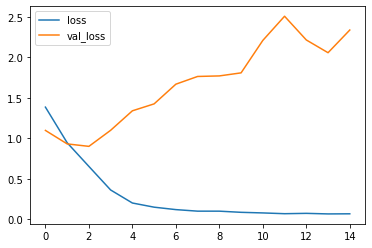

In [6]:
# Plot loss graph
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

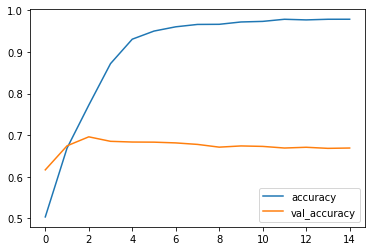

In [7]:
# Plot accuracy graph
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [8]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 2s 5ms/step - loss: 2.3360 - accuracy: 0.6691
[2.3360018730163574, 0.6690999865531921]


In [9]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix without normalization
[[752  15  61  30  10   6   5   9  76  36]
 [ 22 822   6  23   2   2  11   3  25  84]
 [100   3 547 112  66  63  46  35  15  13]
 [ 39  15  77 542  43 153  52  40  11  28]
 [ 31  10  95 132 506  68  44  93  15   6]
 [ 24   8  65 216  27 555  25  68   2  10]
 [ 13  11  51 113  28  49 699  12  16   8]
 [ 20   7  54  65  38  70   5 722   2  17]
 [ 76  44  24  26   1   5   4   6 782  32]
 [ 30 104  11  31   5   7   2  13  33 764]]


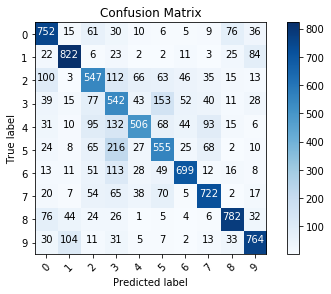

In [10]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [14]:
labels = """airplane
automobile
bird
cat
deer
dog
frog
horse
shop
truck
""".split()

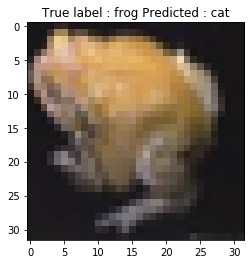

In [15]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title('True label : %s Predicted : %s' % (labels[y_test[i]], labels[p_test[i]]))
plt.show()